## Topic Modeling Classwork

## Open the file

In [27]:
# Import the pandas library, which is a powerful tool for data manipulation and analysis.
import pandas as pd

# Specify the file path of the CSV file you want to read.
file = "C:\\Users\\himav\\Downloads\\un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame using pandas' read_csv function.
df = pd.read_csv(file)df = pd.read_csv(file)

# Display the first 20 rows of the DataFrame to get an initial look at the data.
df.head(20) 

session  year country                     country_name  \
0        25  1970     ALB                          Albania   
1        25  1970     ARG                        Argentina   
2        25  1970     AUS                        Australia   
3        25  1970     AUT                          Austria   
4        25  1970     BEL                          Belgium   
5        25  1970     BLR                          Belarus   
6        25  1970     BOL  Bolivia, Plurinational State of   
7        25  1970     BRA                           Brazil   
8        25  1970     CAN                           Canada   
9        25  1970     CMR                         Cameroon   
10       25  1970     COG                            Congo   
11       25  1970     COL                         Colombia   
12       25  1970     CRI                       Costa Rica   
13       25  1970     CUB                             Cuba   
14       25  1970     DOM               Dominican Republic   
15       25  1970     DZA                          Algeria   
16       25  1970     ECU                          Ecuador   
17       25  1970     FRA                           France   
18       25  1970     GBR                   United Kingdom   
19       25  1970     GHA                            Ghana   

                  speaker    position  \
0                 Mr. NAS         NaN   
1      Mr. DE PABLO PARDO         NaN   
2             Mr. McMAHON         NaN   
3      Mr. KIRCHSCHLAEGER         NaN   
4              Mr. HARMEL         NaN   
5          Mr. GURINOVICH         NaN   
6      Mr. CAMACHO OMISTE         NaN   
7      Mr. GIBSON BARBOZA         NaN   
8               Mr. SHARP         NaN   
9              Mr. AHIDJO  President    
10            Mr. ICKONGA         NaN   
11  Mr. VASQUEZ CARRIZOSA         NaN   
12              Mr. FACIO         NaN   
13            Mr. ALARCON         NaN   
14        Mr FERNANDEZ G.               
15              Mr. YAZID         NaN   
16            Mr. Benites         NaN   
17           Mr. SCHUMANN         NaN   
18   Sir Alec DOUGLASHOME         NaN   
19              Mr. OWUSU         NaN   

                                                 text  
0   33: May I first convey to our President the co...  
1   177.\t : It is a fortunate coincidence that pr...  
2   100.\t  It is a pleasure for me to extend to y...  
3   155.\t  May I begin by expressing to Ambassado...  
4   176. No doubt each of us, before coming up to ...  
5   \n71.\t. We are today mourning the untimely de...  
6   135.\t  I wish to congratulate the President o...  
7   1.\tMr. President, I should like, first of all...  
8   \nThe General Assembly is fortunate indeed to ...  
9   : A year ago I came here as the Acting Preside...  
10  122.\t  I cannot begin my intervention without...  
11  Mr. President, this visit to the United Nation...  
12  62.\t  Mr. President, your election to the Pre...  
13  1.\t  Mr. President, I should first like to co...  
14  \n\n\n Mr. President, it was a source of great...  
15  1.  The delegation of Algeria is very pleased ...  
16  71.  It had been my hope that a loftier person...  
17  84.\t  Within one month, when we celebrate the...  
18  110.\t Mr. President, I should like first to s...  
19  121.\t I should like to begin by congratulatin...

## Look at a couple of texts

In [28]:
# Retrieve and print the first 400 characters of the text in row 2666.
print(repr(df.iloc[2666]["text"][0:400]))

# Retrieve and print the first 400 characters of the text in row 4726.
print(repr(df.iloc[4726]["text"][0:400]))

'\ufeffIt is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the presidency of the forty-fourth session of the General Assembly. His election to this high office is a well-deserved tribute to his personal qualities and experience. I am fully confident that under his able and wise leadership the Assembly will further c'
'\ufeffI wish to join\nother representatives in congratulating you, Sir, on\nyour unanimous election as President of the fifty-sixth\nsession of the General Assembly. We are confident that\n27\n\nunder your able guidance the work of this General\nAssembly session will be another milestone on the new\ninternational scene, particularly in confronting the new\nchallenges facing our world, especially after the\nextre'


## We will split speech into sentences

In [29]:
# Import the regular expressions library, which provides tools for working with regular expressions.
import re

# Add a new column 'paragraphs' to the DataFrame by splitting the 'text' column into paragraphs.
df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))

# Add another new column 'number_of_paragraphs' to the DataFrame.
df["number_of_paragraphs"] = df["paragraphs"].map(len)

## Start by getting TFIDF

In [30]:
# Install spacy
pip install spacy

In [31]:
# Import TfidfVectorizer from sklearn for text feature extraction.
from sklearn.feature_extraction.text import TfidfVectorizer

# Import stop words from spaCy's English language module.
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert stop words set to a list
stopwords_list = list(stopwords)

# Initialize TfidfVectorizer with the list of stop words
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape

C:\Users\himav\.anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(7507, 24611)

## Make a data frame of sentences

In [32]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "year": year }
for paragraphs, year in zip(df["paragraphs"], df["year"])
for paragraph in paragraphs if paragraph])

# Display the first 10 rows of the resulting DataFrame
paragraph_df.head(10)

text  year
0  33: May I first convey to our President the co...  1970
1  35.\tThe utilization of the United Nations to ...  1970
2  36.\tThe whole of progressive mankind recalls ...  1970
3  37.\tAll this has had well known consequences ...  1970
4  38.\tOne of the undeniable proofs that the Uni...  1970
5  39.\tUndoubtedly, such a state of affairs in t...  1970
6  40.\tThe liberation movement at the world leve...  1970
7  41.\tPanic-stricken at the impetuous growth of...  1970
8  42.\tAlthough split by numerous contradictions...  1970
9  43.\tIn that connexion we can cite, simultaneo...  1970

## Get the TFIDF of the sentences DF

In [33]:
# Import TfidfVectorizer from sklearn for text feature extraction.
from sklearn.feature_extraction.text import TfidfVectorizer

# Import stop words from spaCy's English language module.
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Use 'english' instead of the set of stop words
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])

# Print the shape of the resulting TF-IDF matrix.
tfidf_para_vectors.shape

(279076, 25156)

## NMF

In [34]:
# Import NMF (Non-Negative Matrix Factorization) from scikit-learn for matrix factorization.
from sklearn.decomposition import NMF

# Initialize NMF model with 10 components and a random state for reproducibility.
nmf_text_model = NMF(n_components=10, random_state=42)

# Fit the NMF model to the TF-IDF text vectors.
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)

# Extract the components (topic-term matrix) learned by the NMF model.
H_text_matrix = nmf_text_model.components_

C:\Users\himav\.anaconda\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## Done! Let’s look at our 10 topics:

In [35]:
# Display the top words for each topic in a given NMF model.
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]] * 100.0 / total)))

# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())



Topic 00
 co (0.79)
 operation (0.65)
 disarmament (0.36)
 nuclear (0.34)
 relations (0.25)

Topic 01
 terrorism (0.38)
 challenges (0.32)
 sustainable (0.30)
 millennium (0.29)
 reform (0.28)

Topic 02
 africa (1.15)
 african (0.82)
 south (0.63)
 namibia (0.36)
 delegation (0.30)

Topic 03
 arab (1.02)
 israel (0.89)
 palestinian (0.60)
 lebanon (0.54)
 israeli (0.54)

Topic 04
 american (0.33)
 america (0.31)
 latin (0.31)
 panama (0.21)
 bolivia (0.21)

Topic 05
 pacific (1.55)
 islands (1.23)
 solomon (0.86)
 island (0.82)
 fiji (0.71)

Topic 06
 soviet (0.81)
 republic (0.78)
 nuclear (0.68)
 viet (0.64)
 socialist (0.63)

Topic 07
 guinea (4.26)
 equatorial (1.75)
 bissau (1.53)
 papua (1.47)
 republic (0.57)

Topic 08
 european (0.61)
 europe (0.44)
 cooperation (0.39)
 bosnia (0.34)
 herzegovina (0.30)

Topic 09
 caribbean (0.98)
 small (0.66)
 bahamas (0.63)
 saint (0.63)
 barbados (0.61)


## Run same model

In [36]:
# Import NMF (Non-Negative Matrix Factorization) from scikit-learn for matrix factorization.
from sklearn.decomposition import NMF

# Initialize NMF model
nmf_para_model = NMF(n_components=10, random_state=42)

# Fit NMF model to the TF-IDF vectors
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

# Display topics
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
 international (2.01)
 world (1.50)
 community (0.91)
 new (0.76)
 peace (0.67)

Topic 01
 general (2.88)
 session (2.85)
 assembly (2.83)
 mr (2.00)
 president (1.83)

Topic 02
 countries (4.41)
 developing (2.49)
 economic (1.51)
 developed (1.35)
 trade (0.92)

Topic 03
 nations (5.61)
 united (5.50)
 organization (1.27)
 states (1.03)
 charter (0.93)

Topic 04
 nuclear (4.91)
 weapons (3.25)
 disarmament (2.01)
 treaty (1.70)
 proliferation (1.45)

Topic 05
 rights (6.51)
 human (6.20)
 respect (1.16)
 fundamental (0.86)
 universal (0.83)

Topic 06
 africa (3.80)
 south (3.30)
 african (1.70)
 namibia (1.38)
 apartheid (1.18)

Topic 07
 security (6.08)
 council (5.82)
 permanent (1.48)
 reform (1.47)
 peace (1.31)

Topic 08
 people (1.35)
 peace (1.32)
 east (1.28)
 middle (1.17)
 palestinian (1.15)

Topic 09
 development (4.51)
 sustainable (1.20)
 economic (1.07)
 social (1.00)
 goals (0.94)


 ## How “BIG” is each topic?

In [37]:
# Compute the sum of each column (topic) in the document-topic matrix (W_matrix)
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([11.06189432, 17.0213082 , 13.6565622 , 10.18695452, 11.35821532,
        5.95003141,  7.90001101,  4.13937503, 11.91132462,  6.81432338])

## Topic sizes:

In [38]:
# Compute the sum of each column (topic) in the document-topic matrix (W_para_matrix)
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([11.99461472, 10.12384143, 10.13359996, 14.58547101,  6.74889346,
        7.06521386,  8.61823051,  8.23846492, 11.85285437, 10.63881575])

## RUN this code:

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

# Assuming 'paragraph_df' is defined earlier
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])

# Check the shape of the document-term matrix
print("Shape of document-term matrix:", count_para_vectors.shape)

# Define and fit the LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

C:\Users\himav\.anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


Shape of document-term matrix: (279076, 25162)


## Start by cutting the paragraphs into words:

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stop words set to a list
stopwords_list = list(stopwords)

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
print(count_para_vectors.shape)


(279076, 25162)


## Run the LDA

In [41]:
# Display the top words for each topic in a given topic model.
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
general assembly session president mr

Topic 2:
world human people peace nations

Topic 3:
nuclear weapons disarmament arms states

Topic 4:
international security united nations council

Topic 5:
countries economic developing development international

Topic 6:
peace east middle people israel

Topic 7:
states countries peace relations peoples

Topic 8:
africa south united nations african

Topic 9:
people republic government united nations

Topic 10:
nations united development international world


## Topic sizes

In [49]:
# Compute the sum of each column (topic) in the document-topic matrix (W_lda_para_matrix)
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.96413708, 13.1939403 ,  7.04455321, 11.08311812,  9.84055263,
        8.80334442,  8.89408336,  6.94897733,  9.48290182, 15.74439172])

## draw wordclouds for the 10 topics

In [43]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

# Set the height of the output scroll area for better visualization
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

# Generate and display word clouds for each topic in a given topic model.
def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

## The NMF wordclouds:

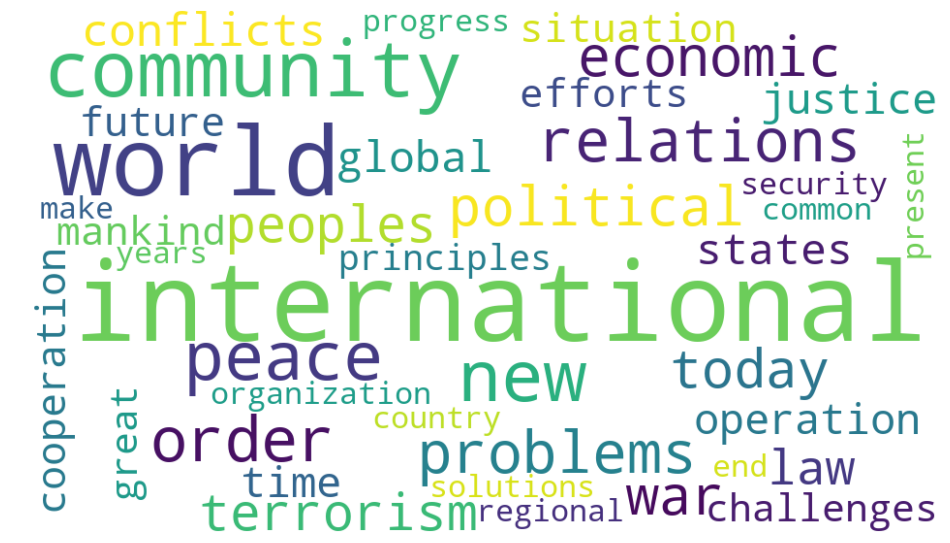

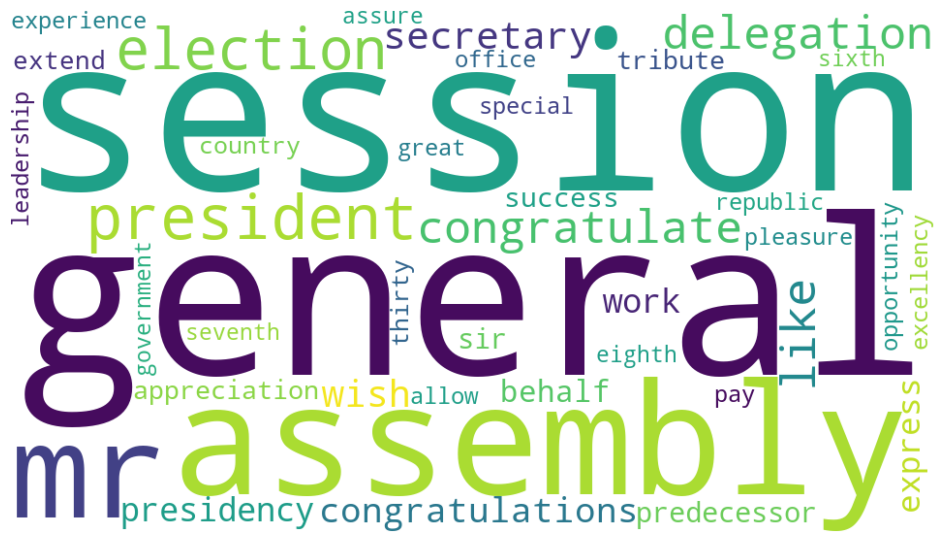

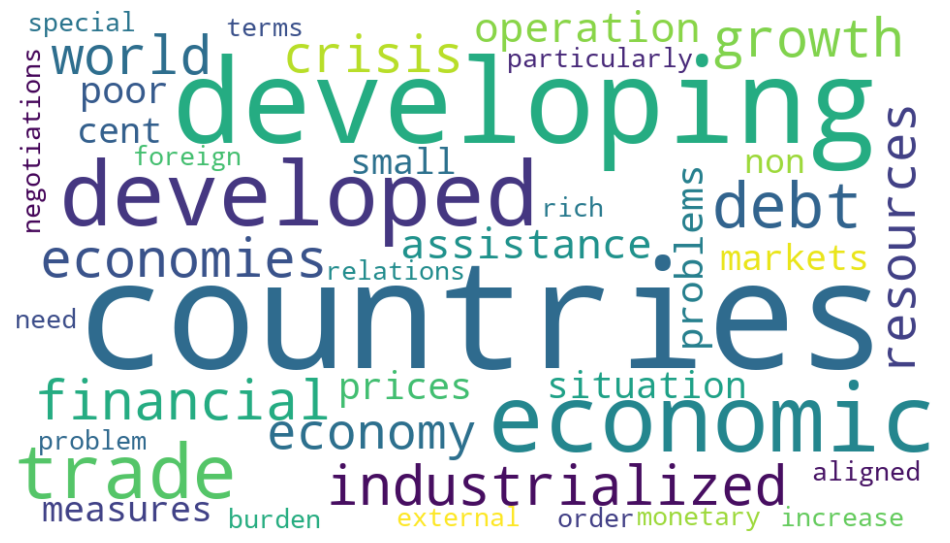

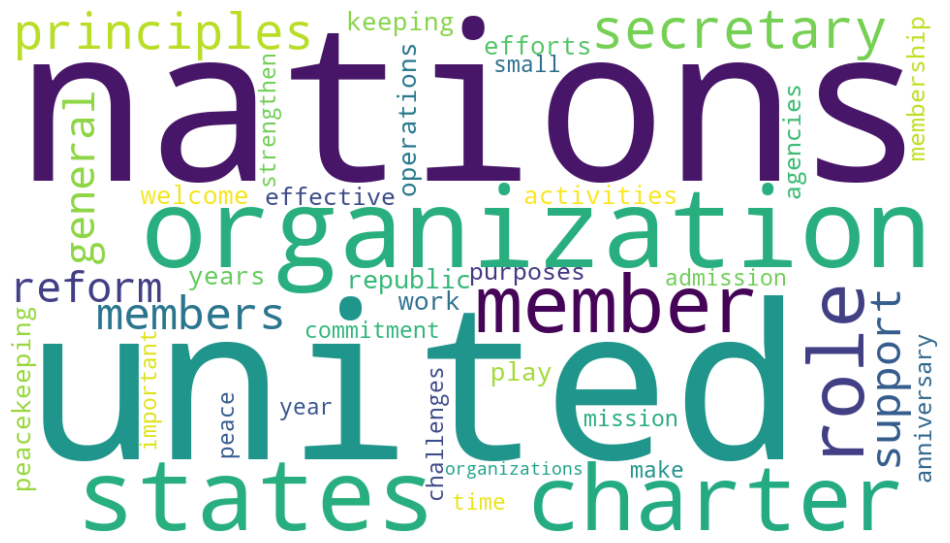

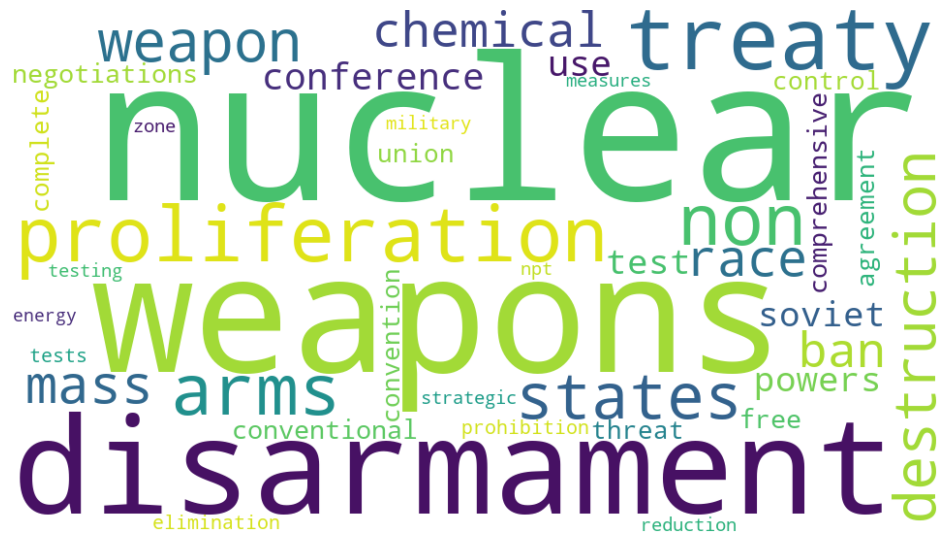

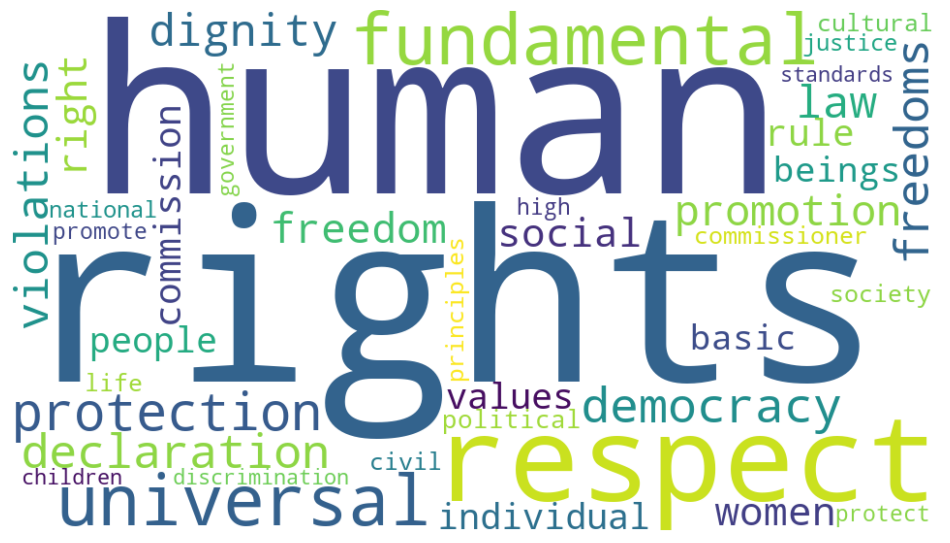

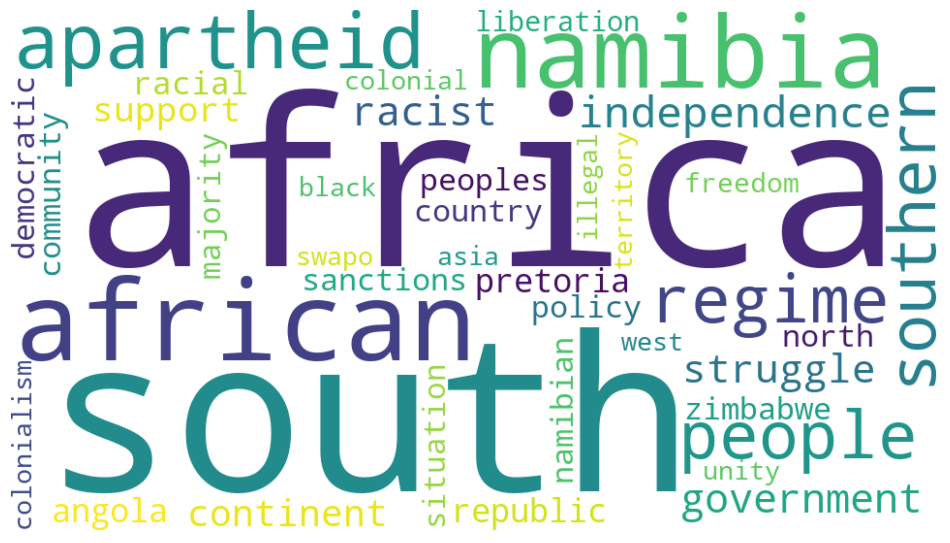

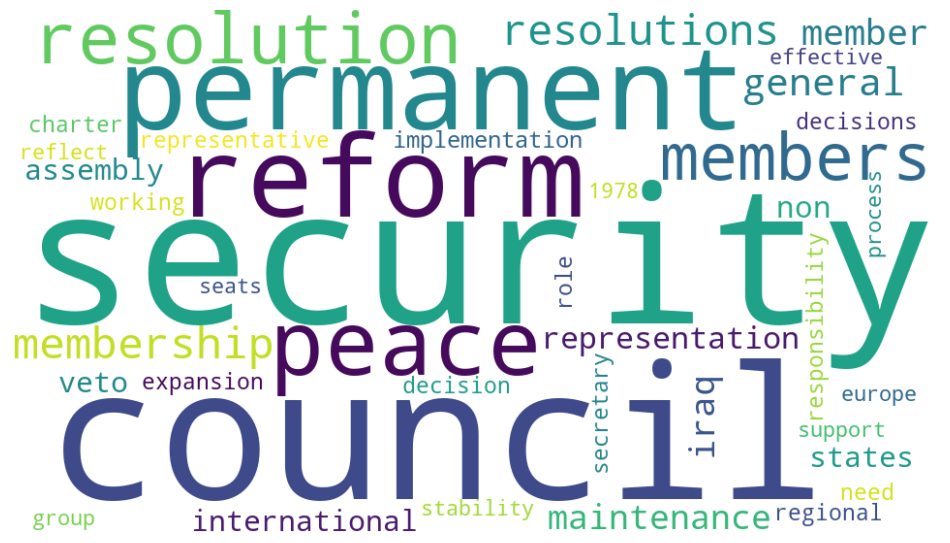

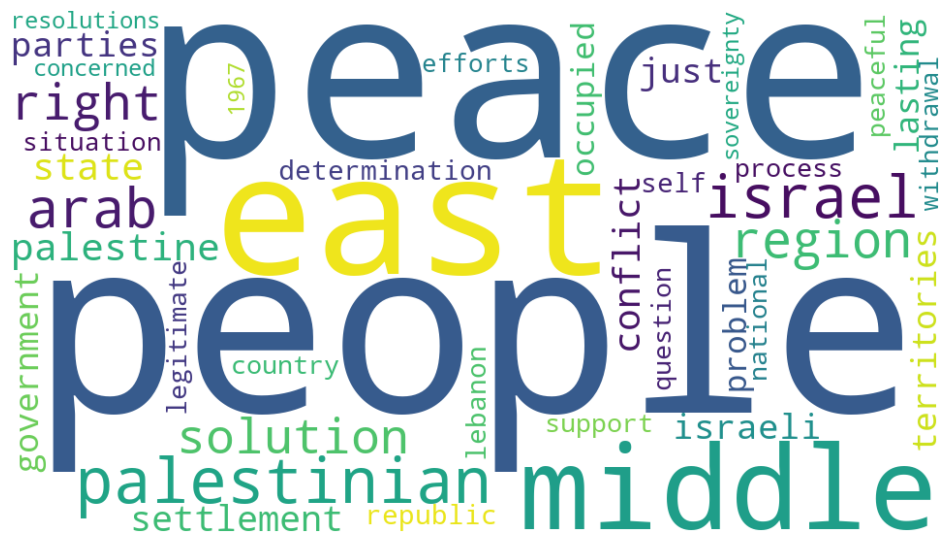

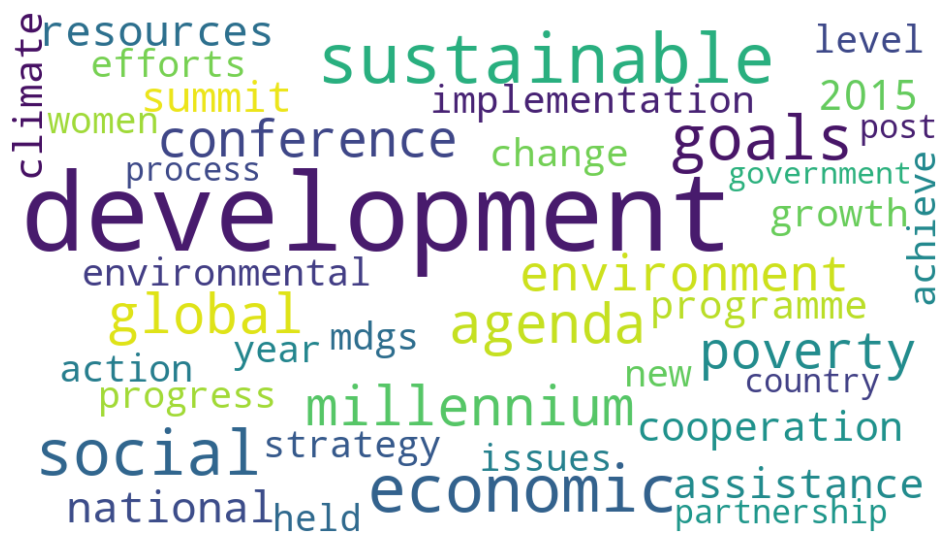

In [44]:
# Generate and display word clouds for each topic in the given topic model
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

## The LDA wordclouds

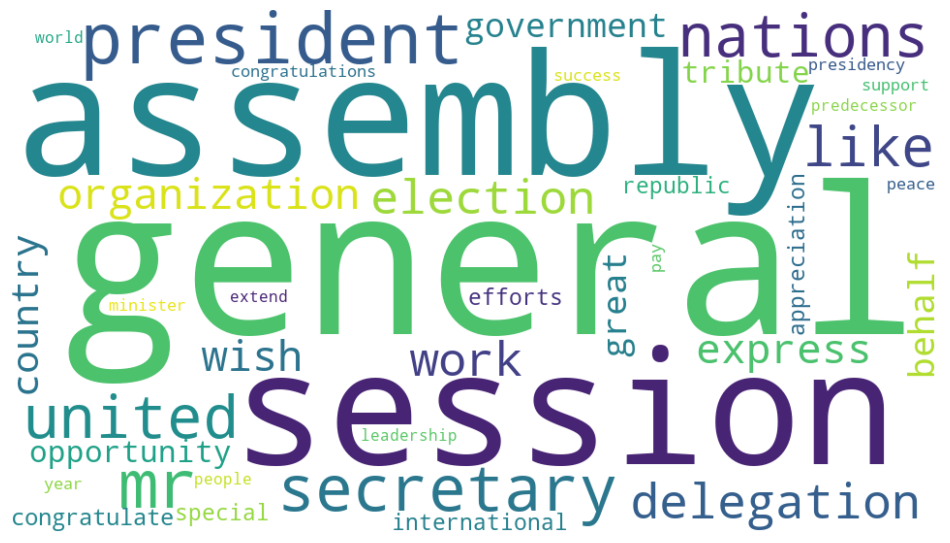

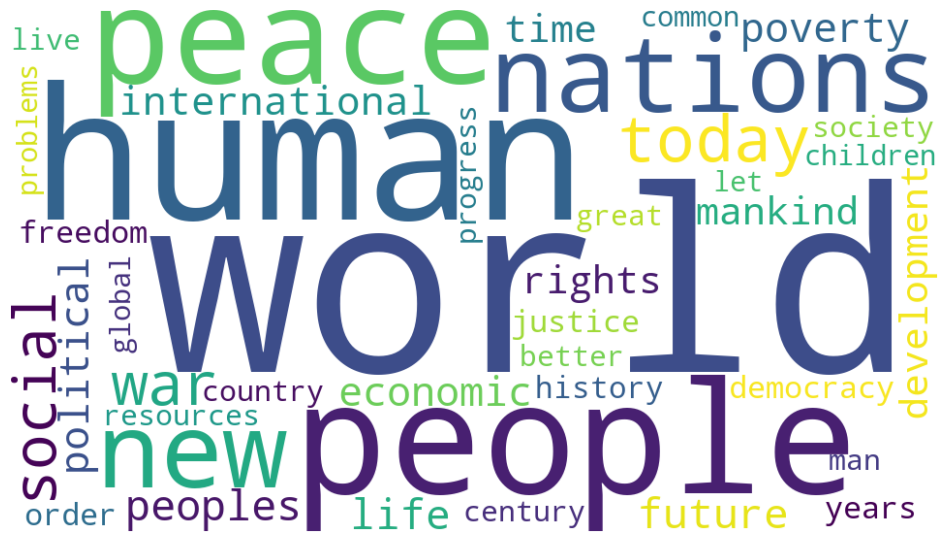

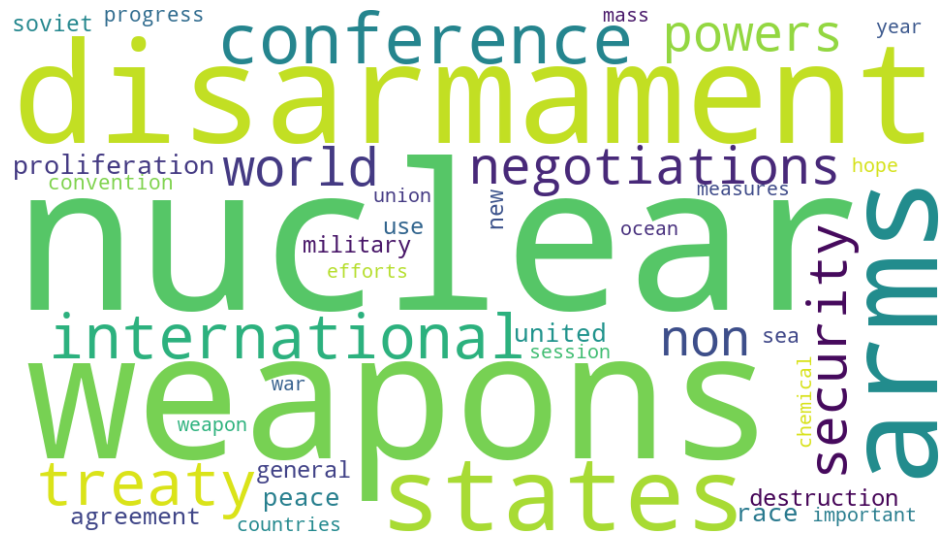

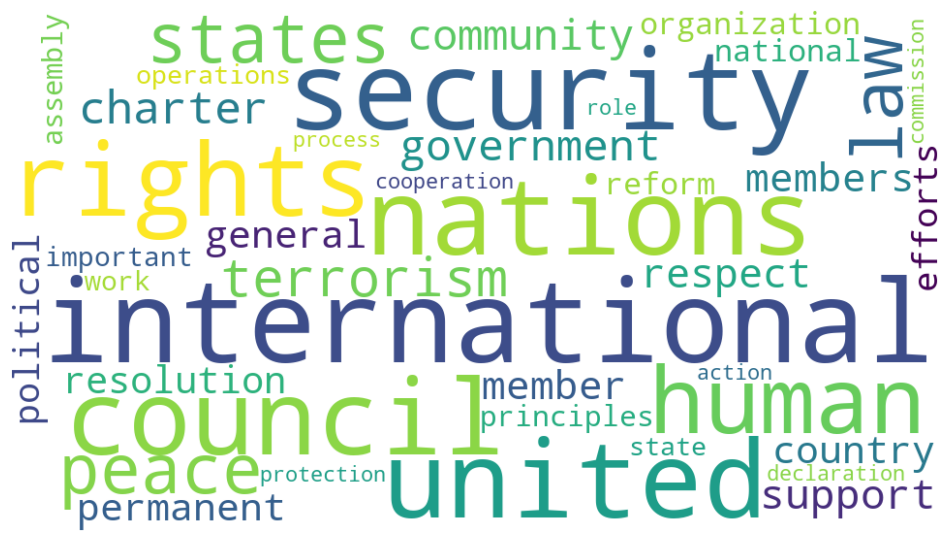

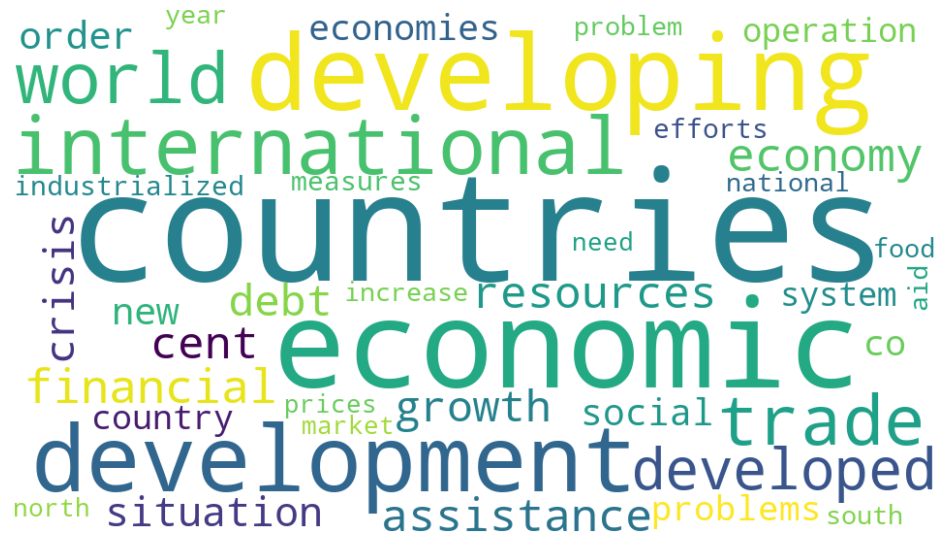

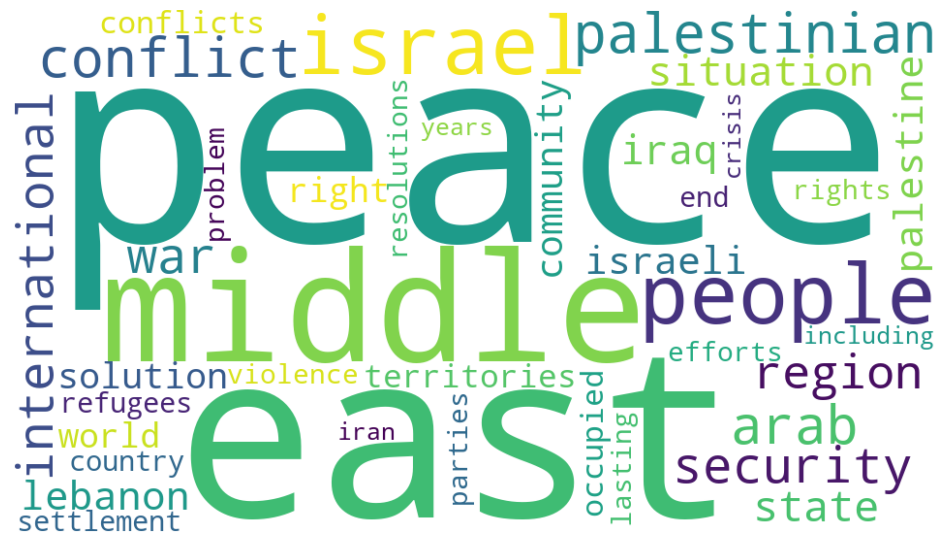

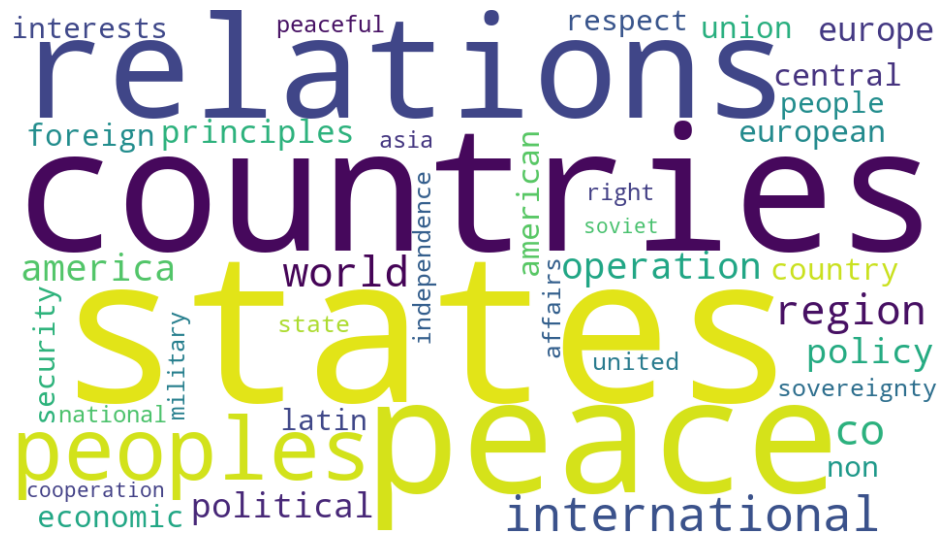

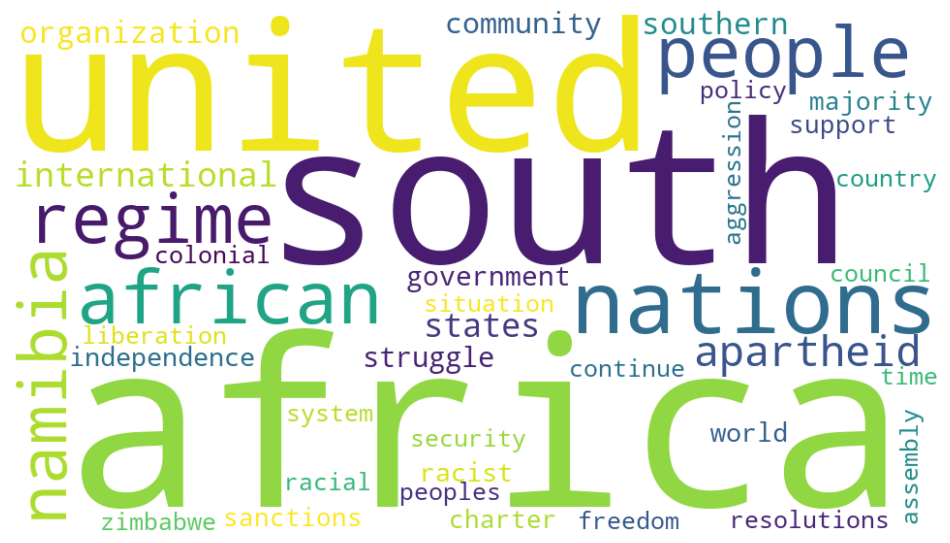

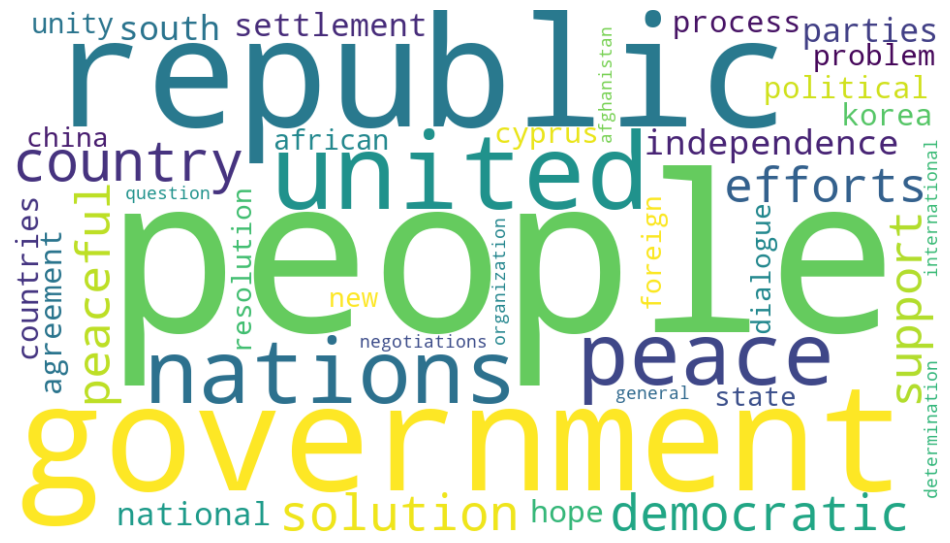

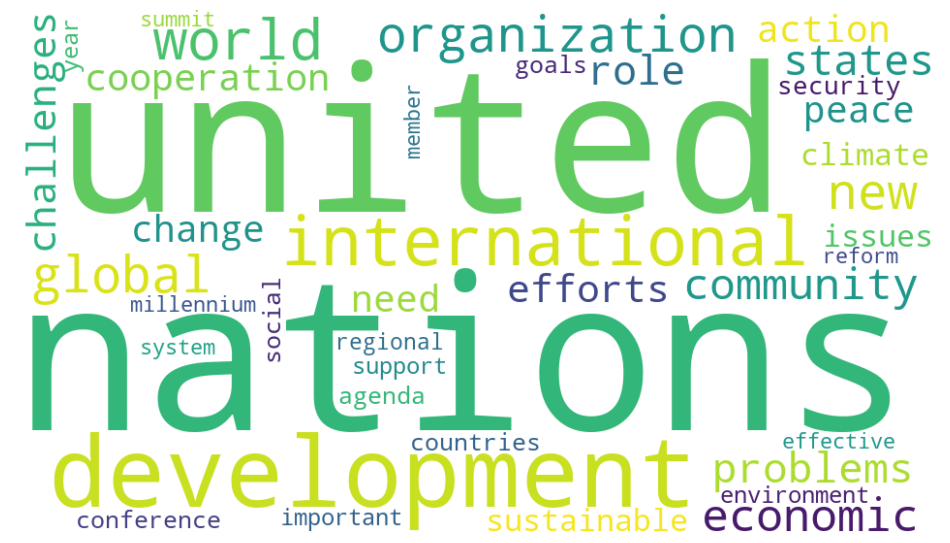

In [45]:
# Generate and display word clouds for each topic in the given topic model
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [46]:
# Initialize an empty list to store the names of the topics
topic_names = []

# Get the list of feature names (vocabulary) from the TF-IDF vectorizer
voc = tfidf_para_vectorizer.get_feature_names_out()

# Iterate over each topic in the NMF model components
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    
    # Append the topic name to the list of topic names
    topic_names.append("Topic " + top_word)

## Separate data by year

In [47]:
# Import necessary libraries
from tqdm.auto import tqdm
import numpy as np

# Initialize an empty list to store the year-wise topic distribution data
year_data = []

# Get the unique years from the paragraph DataFrame
unique_years = np.unique(paragraph_df["year"])

# Iterate over unique years, tracking progress with tqdm
for year in tqdm(unique_years):
    year_indices = np.array(paragraph_df["year"] == year)
    if np.any(year_indices):  # Check if there are samples available for the current year
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))

  0%|          | 0/46 [00:00<?, ?it/s]

## Draw time chart

<Axes: xlabel='price'>

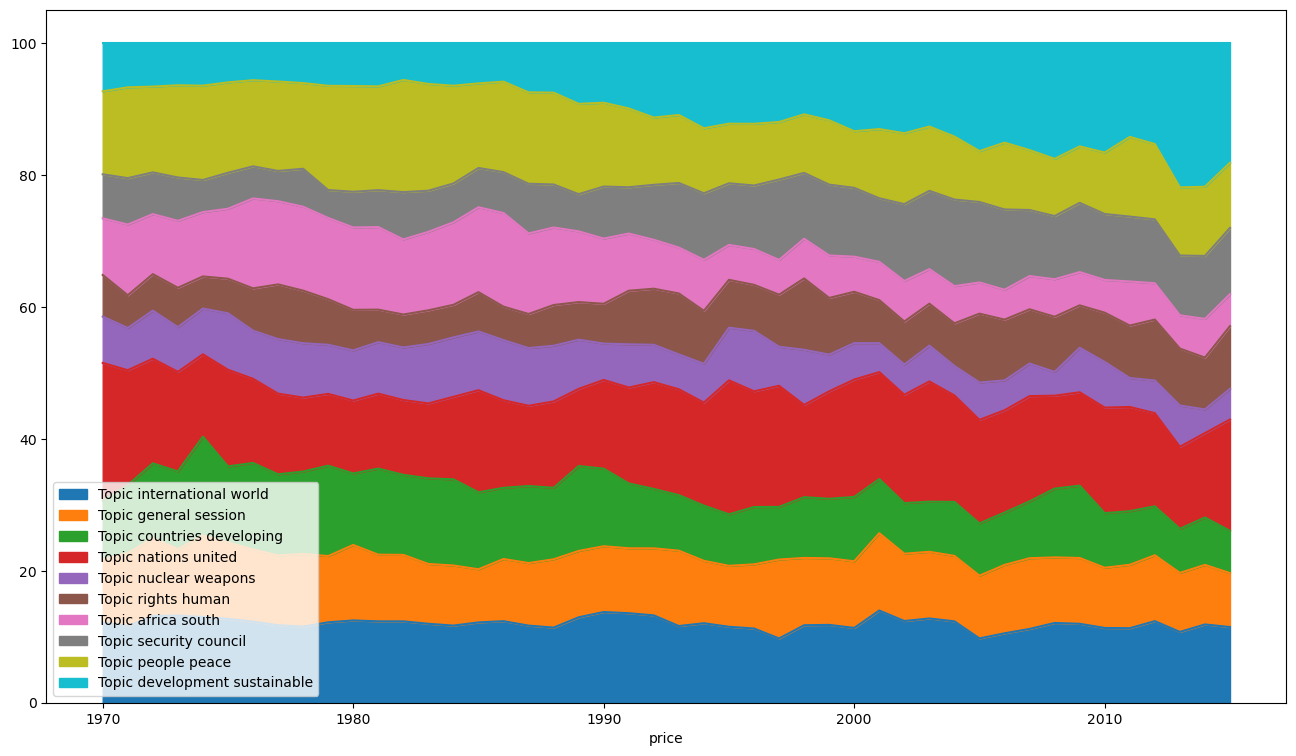

In [48]:
# Import necessary library
import matplotlib.pyplot as plt

# Create a DataFrame from the year-wise topic distribution data
df_year = pd.DataFrame(year_data, columns=["price"] +
topic_names).set_index("price")

# Plot the data as an area plot
df_year.plot.area(figsize=(16,9))